In [1]:
import control
import numpy as np

In [2]:
num = np.array([200])
den = np.array([1, 10,100])

Gs = control.TransferFunction(num, den)
Gs

TransferFunction(array([200]), array([  1,  10, 100]))

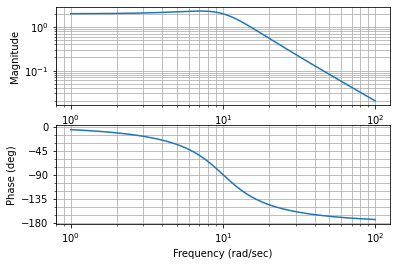

In [3]:
(mag, phase_rad, w) = control.bode_plot(Gs)

In [4]:
phase_rad

array([-0.10066865, -0.10114002, -0.10161366, -0.10208958, -0.10256778,
       -0.10304828, -0.1035311 , -0.10401624, -0.10450371, -0.10499354,
       -0.10548572, -0.10598028, -0.10647722, -0.10697657, -0.10747832,
       -0.10798249, -0.1084891 , -0.10899816, -0.10950968, -0.11002367,
       -0.11054015, -0.11105913, -0.11158063, -0.11210465, -0.11263121,
       -0.11316032, -0.113692  , -0.11422626, -0.11476311, -0.11530257,
       -0.11584466, -0.11638937, -0.11693674, -0.11748677, -0.11803948,
       -0.11859488, -0.11915299, -0.11971381, -0.12027737, -0.12084369,
       -0.12141276, -0.12198462, -0.12255927, -0.12313673, -0.12371702,
       -0.12430014, -0.12488613, -0.12547498, -0.12606672, -0.12666136,
       -0.12725891, -0.12785941, -0.12846285, -0.12906926, -0.12967865,
       -0.13029103, -0.13090644, -0.13152487, -0.13214635, -0.1327709 ,
       -0.13339852, -0.13402925, -0.13466309, -0.13530007, -0.13594019,
       -0.13658349, -0.13722996, -0.13787965, -0.13853255, -0.13

In [5]:
(GM, PM, wg, wp) = control.margin(Gs)
wp

15.174899135519796

In [6]:
def rad2hz(rad: float)->float:
    return rad*0.159155

In [7]:
largBand = rad2hz(wp)
largBand

2.415161071913653

In [8]:
freqS = 10*largBand
Ts = 1/freqS

In [9]:
print(str(freqS) + ' Hz')
print(str(Ts)+ " s")

24.15161071913653 Hz
0.04140510592147172 s


In [10]:
Gz = control.sample_system(Gs, Ts, 'zoh')
Gz

TransferFunction(array([0.14796575, 0.12881121]), array([ 1.        , -1.52257872,  0.6609672 ]), 0.04140510592147172)

In [11]:
import matplotlib.pyplot as plt

In [12]:
Tsim = np.arange(0, 10, Ts)

In [13]:
youts, T1 = control.step_response(Gs, Tsim)

In [14]:
youtz, T2 = control.step_response(Gz, Tsim)

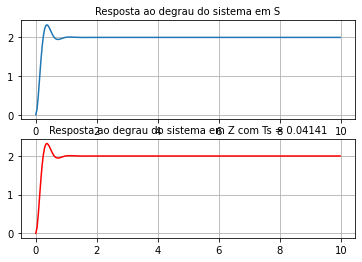

In [15]:
plt.subplot(2,1,1)
plt.title("Resposta ao degrau do sistema em S", size = 10)
plt.grid()
plt.plot(youts, T1)
plt.subplot(2,1,2)
plt.title("Resposta ao degrau do sistema em Z com Ts = "+str(round(Ts, 5)), size = 10)
plt.grid()
plt.plot(youtz, T2, color = 'red')

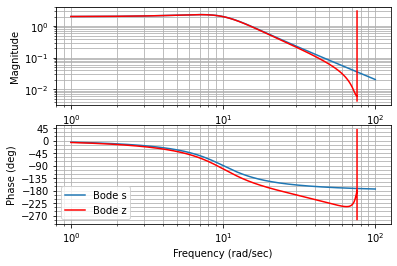

In [16]:
(mag, phase_rad, w) = control.bode_plot(Gs, label = 'Bode s')
(mag1, phase_rad1, w1) = control.bode_plot(Gz, color = 'red', label = 'Bode z')
plt.legend()

In [17]:
from control.matlab import c2d

In [18]:
import harold

In [19]:
Gs1 = harold.Transfer(num, den)
Gs1

Continuous-Time Transfer function
 1 input and 1 output

  Poles(real)    Poles(imag)  Zeros(real)    Zeros(imag)
-------------  -------------  -------------  -------------
           -5        8.66025
           -5       -8.66025


In [20]:
Gz1 = harold.discretize(Gs1, Ts, method = 'zoh')

In [21]:
Gz1.num

array([[0.14796575, 0.12881121]])

In [22]:
Gw1 = harold.undiscretize(Gz1, method = 'tustin')
Gw1.num[0][:]

array([-6.01673077e-03, -3.90884659e+00,  2.02848126e+02])

In [23]:
Gw = control.TransferFunction(Gw1.num[0], Gw1.den[0])
Gw

TransferFunction(array([-6.01673077e-03, -3.90884659e+00,  2.02848126e+02]), array([  1.        ,  10.28813575, 101.42406293]))

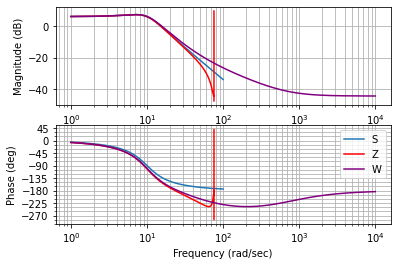

In [24]:
control.bode_plot(Gs, label = "S");
control.bode_plot(Gz, color = 'red', label = 'Z');
control.bode_plot(Gw, color = 'purple', label = 'W');
plt.legend()

In [25]:
mag[10]

2.0109345686354945

In [26]:
w[10]

1.0471768194855202

In [27]:
# z = e^(Ts) = e^(Tjw)
# G(w) = 0.148e^(j0.0414w)+0.1288 / (e^(j0.0414w))^2 - 1.523e^(j0.0414w) +0.661

In [28]:
import cmath

In [29]:
j = complex(0, 1)
j

1j

In [30]:
w = np.arange(0, 100, 0.1)
out = []
for i in w:
    G = (0.148*cmath.exp((0.0414*i)*j)+0.1288 )/ (((cmath.exp((0.0414*i)*j))**2 - 1.523*cmath.exp((0.0414*i)*j) +0.661))
    out.append(10*cmath.log10(abs(G)))#convert to db

c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


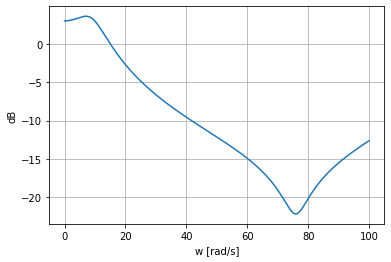

In [31]:
plt.grid()
plt.xlabel("w [rad/s]")
plt.ylabel("dB")
#plt.yscale('log')
#plt.xscale('log')
plt.plot(w, out)

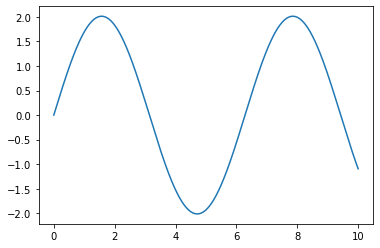

In [32]:
freq = 1 #rad/s
f = freq /(2*180*np.pi)
time = np.arange(0, 10, f)
sinal=[]
for t in time:
    sinal.append(mag[10]*np.sin(t))


plt.plot(time, sinal)

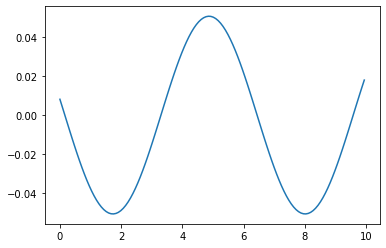

In [33]:
freq = 90 #rad/s
f = freq /(2*180*np.pi)
shift = phase_rad[10*freq]
time = np.arange(0, 10, f)
sinal=[]
ganho = mag[10*freq]
for t in time:
    sinal.append(ganho*np.sin(t-shift))


plt.plot(time, sinal)

In [34]:
Gs

TransferFunction(array([200]), array([  1,  10, 100]))

In [35]:
def plotSysResp(Gs, rad, tsim = 4):
    from control import matlab
    time = np.arange(0, tsim, 0.0001)
    sinal = []
    for t in time:
        sinal.append(np.sin(rad*t))
    plt.plot(time, sinal, label = 'Original')
    yout, T, xout = matlab.lsim(Gs, U = sinal, T = time)
    plt.plot(T, yout, label = 'Saida')
    plt.grid()
    plt.legend()

In [36]:
#%matplotlib notebook

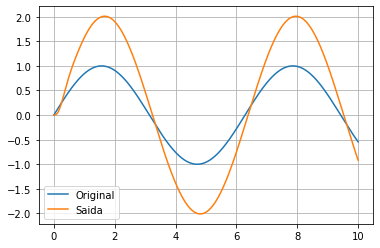

In [48]:
plotSysResp(Gs, 1, 10)

c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\control\timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


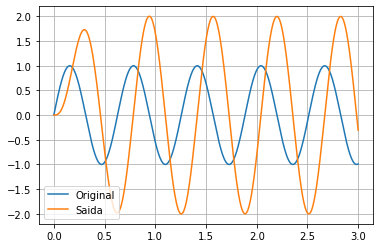

In [38]:
plotSysResp(Gs, 10, 3)

c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\control\timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


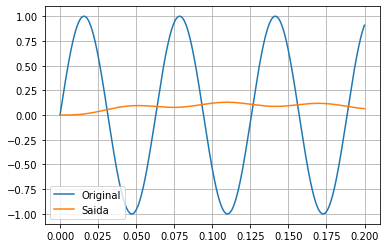

In [47]:
plotSysResp(Gs, 100, 0.2)

In [40]:
import seaborn as sns

In [41]:
def respSin(freq, color = 'blue'):
    f = freq /(2*180*np.pi)
    shift = phase_rad[10*freq]
    time = np.arange(0, 10, f)
    sinal=[]
    ganho = mag[10*freq]
    for t in time:
        sinal.append(ganho*np.sin(t-shift))
        
    plt.plot(time, sinal, color = color, label = str(freq) + 'rad/s')

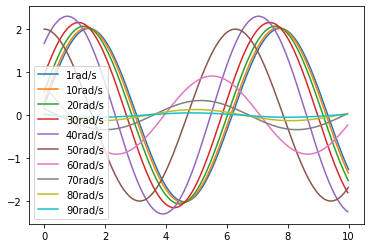

In [42]:
colors = sns.color_palette()
freqs = [1,10,20,30, 40, 50, 60,70,80,90]
for i in range(10):
    respSin(freqs[i], colors[i])
    plt.legend()
    plt.grid()


In [43]:
#Sistema primeira ordem
Gs1 = control.TransferFunction(1, [10, 1])
Gs1

TransferFunction(array([1]), array([10,  1]))

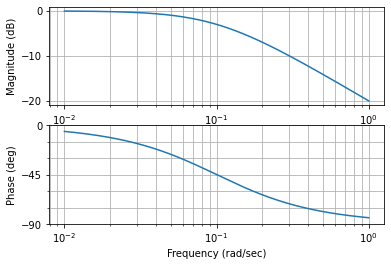

In [44]:
(mag1, phase_rad1, w1) = control.bode_plot(Gs1)
#Cai 20 dB por decada a partir de 10⁻1

In [45]:
wn = 10
coefAmort = 0.5
num2 = wn**2
den2 = [1, 2*coefAmort*wn, wn**2]
Gs2 = control.TransferFunction(num2, den2)
Gs2

TransferFunction(array([100]), array([  1.,  10., 100.]))

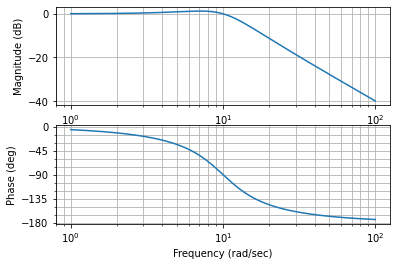

In [46]:
(mag2, phase_rad2, w2) = control.bode_plot(Gs2, dB=True)
#cai 40db por decada a partir de wn
#modulo em 10rad/s = (2*0.5)**-1 = 1